In [5]:
import librosa
from tqdm  import tqdm
import os
import glob
import numpy as np
import pickle
from pathlib import Path

from audio_features import AudioFeature
from utils import load_data, preprocess, get_file_dir
# Load the audio file
# AUDIO_FILE = '/home/amir/uni/ml/mbusic/piano/Annelie_-_Lost.mp3'

In [6]:
data = get_file_dir()
print([(k, len(v)) for k,v in data.items()])

[('santour', 241), ('violin', 258), ('tar', 232), ('setar', 263), ('piano', 240), ('ney', 256)]


In [7]:
preprocess()

santour


100%|██████████| 241/241 [00:08<00:00, 27.96it/s]


violin


100%|██████████| 258/258 [00:06<00:00, 42.08it/s]


tar


100%|██████████| 232/232 [00:06<00:00, 36.95it/s]


setar


100%|██████████| 263/263 [00:08<00:00, 32.25it/s]


piano


100%|██████████| 240/240 [00:08<00:00, 28.06it/s]


ney


100%|██████████| 256/256 [00:06<00:00, 41.37it/s]


In [8]:
X, y = load_data()

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [10]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [11]:
rnd = np.random.RandomState(42)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [13]:


ss = StandardScaler(copy=True)
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

param_grid = {
    "n_estimators": [10, 100, 200, 300, 500, 800],
    "criterion": ["gini", "entropy"],
    "class_weight" : ["balanced", "balanced_subsample"],
    "bootstrap": [True, False],
    "n_jobs": [10],
    

}
clf = RandomForestClassifier(random_state=rnd)
gs = GridSearchCV(estimator=clf, param_grid=param_grid)
gs.fit(X_train, y_train)

y_pred = gs.predict(X_test)

fold_acc = metrics.accuracy_score(y_test, y_pred)

In [14]:
from utils import plot_confusion_matrix, plot_table_grid
from sklearn import metrics
import matplotlib.pyplot as plt

In [15]:
plot_table_grid(gs, 2)

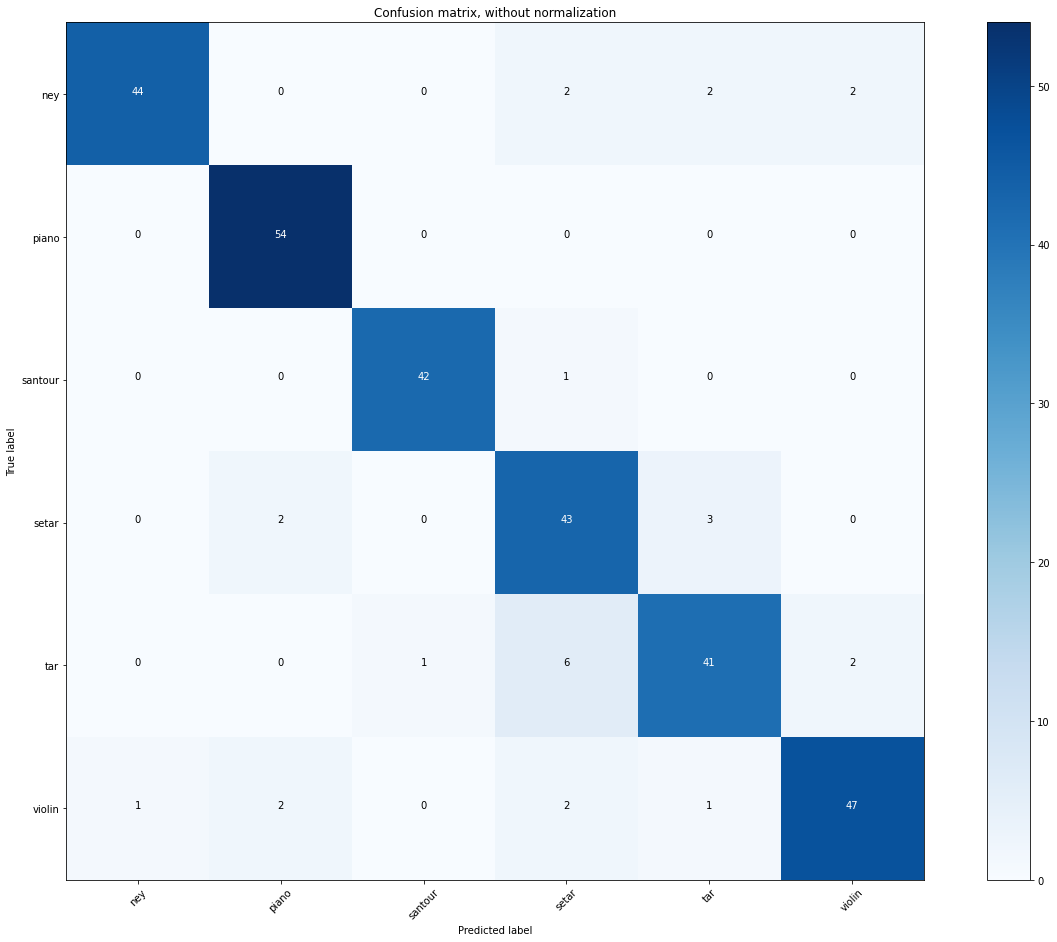

In [16]:
plt.figure(figsize=(18,13))

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=labelencoder.classes_,
                      title='Confusion matrix, without normalization')

In [17]:
print(metrics.classification_report(y_test, y_pred, target_names=labelencoder.classes_))

              precision    recall  f1-score   support

         ney       0.98      0.88      0.93        50
       piano       0.93      1.00      0.96        54
     santour       0.98      0.98      0.98        43
       setar       0.80      0.90      0.84        48
         tar       0.87      0.82      0.85        50
      violin       0.92      0.89      0.90        53

    accuracy                           0.91       298
   macro avg       0.91      0.91      0.91       298
weighted avg       0.91      0.91      0.91       298

